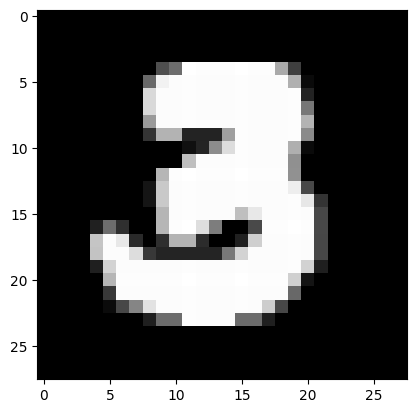

image class = 3


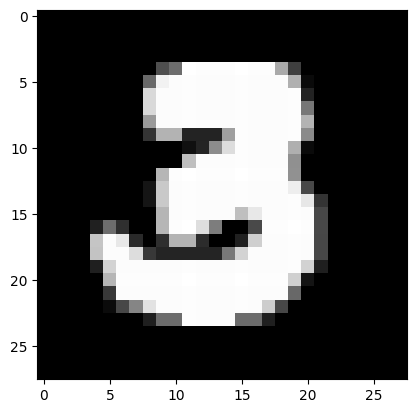

image class = 3
precision = [0.96237624 0.94333333 0.982      0.96825397 0.97409326 0.97075366
 0.97720207 0.95715677 0.98597627 0.95143707]
recall = [0.99183673 0.99735683 0.95155039 0.96633663 0.95723014 0.96748879
 0.98434238 0.95622568 0.93839836 0.95143707]
fscore = [0.97688442 0.96959315 0.96653543 0.96729435 0.96558808 0.96911847
 0.98075923 0.956691   0.96159916 0.95143707]
Accuracy = [ 980 1135 1032 1010  982  892  958 1028  974 1009]
precision = [0.98118235 0.95449374 0.98711119 0.97229917 0.98358389 0.97228381
 0.98270071 0.96883898 0.99133887 0.96176962]
recall = [0.99476617 0.99555028 0.96408191 0.97325069 0.97432386 0.97066962
 0.98867861 0.97765363 0.93898479 0.96839805]
fscore = [0.98792757 0.97458981 0.97546064 0.9727747  0.97893198 0.97147605
 0.98568059 0.97322634 0.96445186 0.96507245]
Accuracy = [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


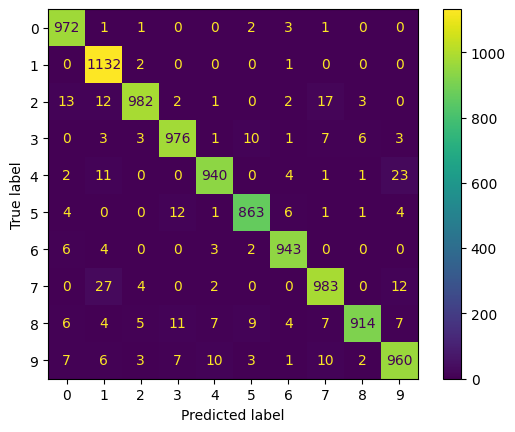

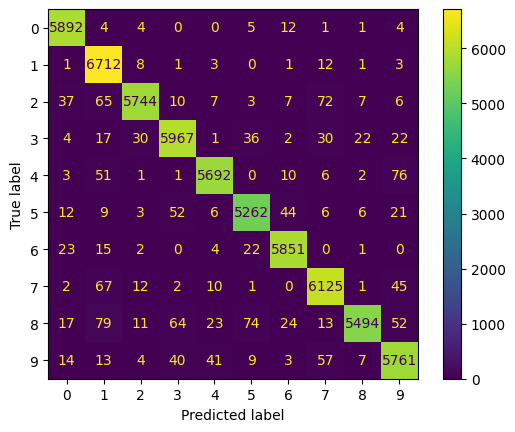

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import MNIST dataset from keras.
from keras.datasets import mnist
#Import kNN Classifier from scikit-learn.
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier
from sklearn.neighbors import KNeighborsRegressor as kNNRegressor
#Import functions with Classification metrics from scikit-learn.
from sklearn.metrics import precision_recall_fscore_support
#Import confusion matrix functions from scikit-learn.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Load MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Print shapes of x_train, y_train, x_test and y_test.
x_train.shape, y_train.shape, x_test.shape, y_test.shape

#ind unique values in y_train and y_test. These unique values represent all unqiue classes in MNIST dataset.
np.unique(y_train)
np.unique(y_test)


#Extract one image from x_train and its respective label from y_train. Plot the image and its label.
ind = 200     # use other indexes

plt.imshow(x_test[ind], cmap = 'gray')
plt.show()
print(f"image class = {y_test[ind]}")

#Reshape images in x_train and x_test into vectors.
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

#Change dtype of values in x_train and x_test to float32.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize x_train and x_test in range of [0; 1].
x_train /= 255
x_test /= 255
#Initialize kNN Classification model.
algorithm = 'brute'
metric = 'euclidean'
k = 10   
model = kNNClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)
#Train kNN Classification model.
model.fit(x_train, y_train)

#Predict with kNN Classification model.
a = model.predict(x_test[200].reshape(1, -1)) #Solo prediction

#Predict with kNN Classification model all images in x_test.
y_test_pred = model.predict(x_test) #All test predictions
#Predict with kNN Classification model all images in x_train.
y_train_pred = model.predict(x_train)#All train predictions
#Plot selected image from x_test and its respective original label from y_test.
plt.imshow(x_test[200].reshape(28, 28), cmap = 'gray')
plt.show()
print(f"image class = {y_test_pred[200]}")

#Use imported functions to calculate Classification metrics for model performance on y_test and y_test_pred.
precision_test, recall_test, fscore_test, accuracy_test = precision_recall_fscore_support(y_test, y_test_pred)
print(f"precision = {precision_test}")
print(f"recall = {recall_test}")
print(f"fscore = {fscore_test}")
print(f"Accuracy = {accuracy_test}")
#Repeat step 3 for y_train and y_train_pred.
precision_train, recall_train, fscore_train, accuracy_train = precision_recall_fscore_support(y_train, y_train_pred)
print(f"precision = {precision_train}")
print(f"recall = {recall_train}")
print(f"fscore = {fscore_train}")
print(f"Accuracy = {accuracy_train}")
#Calculate confusion matrix of y_test and y_test_pred.
labels_test = np.sort(np.unique(y_test))
cm_vals_test = confusion_matrix(y_test, y_test_pred, labels = labels_test)
#print(cm_vals)
#Plot calculated confusion matrix.
cm_plot_test = ConfusionMatrixDisplay(confusion_matrix = cm_vals_test, display_labels = labels_test)
cm_plot_test.plot()
plt.show()

#Repeat step 2 and 3 for y_train and y_train_pred.
labels_train = np.sort(np.unique(y_train))
cm_vals_train = confusion_matrix(y_train, y_train_pred, labels = labels_train)
#print(cm_vals)
cm_plot_train = ConfusionMatrixDisplay(confusion_matrix = cm_vals_train, display_labels = labels_train)
cm_plot_train.plot()
plt.show()



